<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/agePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Change working directory
%cd /content/drive/My Drive/Colab Notebooks/agePrediction

/content/drive/My Drive/Colab Notebooks/agePrediction


In [ ]:
# Import libraries
import cv2
import os
import matplotlib.pyplot as plt

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

In [ ]:
# Load model
faceModel = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
ageModel = cv2.dnn.readNet(
    'deploy_age.prototxt',
    'age_net.caffemodel'
)

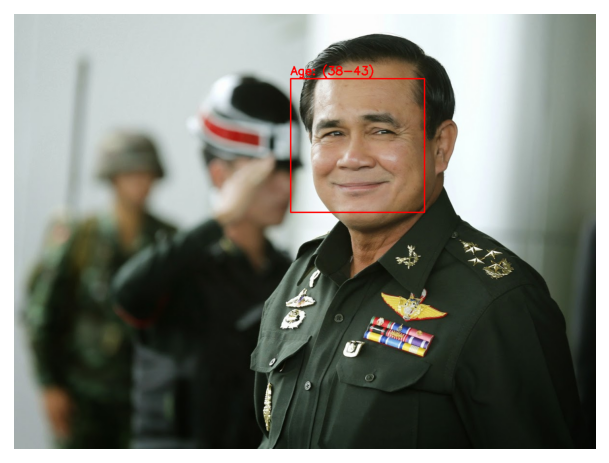

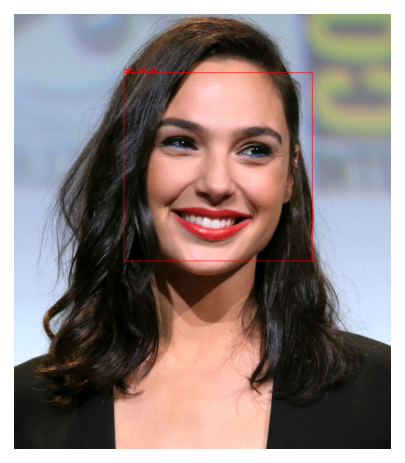

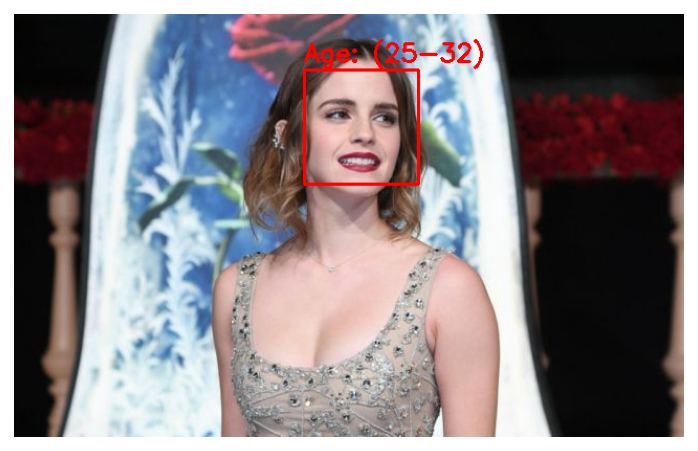

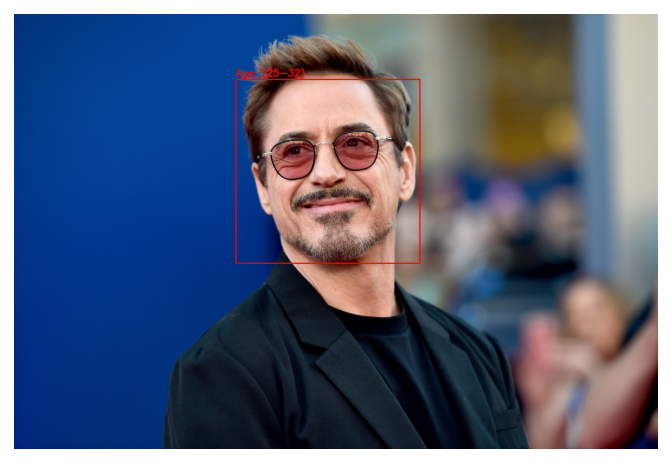

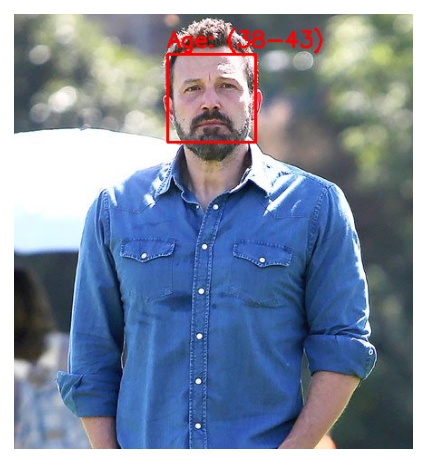

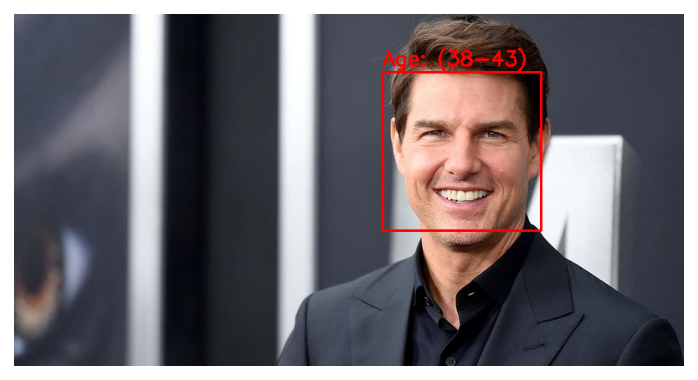

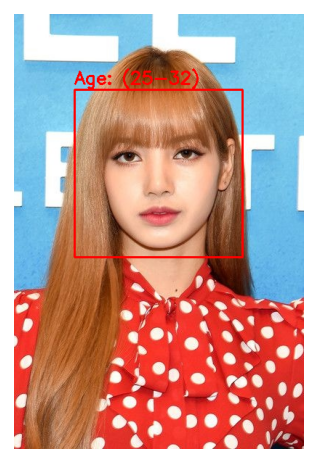

In [ ]:
# Age prediction
# Deine age buckets
ageBuckets = [
              '(0-2)',
              '(4-6)', 
              '(8-12)',
              '(15-20)',
              '(25-32)',
              '(38-43)',
              '(48-53)',
              '(60-100)'
]

# Load images
imagePath = os.path.join(
    os.getcwd(), 'images'
)

for fileName in sorted(os.listdir(imagePath)):
  if fileName.endswith('.jpg'):
    filePath = os.path.join(
        imagePath, fileName
    )
    image = cv2.imread(filePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #To gray scale for face detection
    # Face detection with haarcascade
    faces = faceModel.detectMultiScale(gray, 1.1, 5)
    for (x, y, w, h) in faces:
      face = image[y - 10: y + h + 10, x - 10: x + w + 10][:, :, ::-1] #BGR to RGB
    # Age prediction
    blob = cv2.dnn.blobFromImage(
        face,
        1.0,
        (227, 227),
        (78.4263377603, 87.7689143744, 114.895847746),
        swapRB = False
    )
    ageModel.setInput(blob)
    pred = ageModel.forward()
    label = f'Age: {ageBuckets[pred[0].argmax()]}'
    # Result
    cv2.rectangle(
        image,
        (x, y),
        (x + w, y + h),
        (0, 0, 255),
        2
    )
    cv2.putText(
        image,
        label,
        (x, y - 8),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 0, 255),
        2
    )
    plt.imshow(image[:, :, ::-1])
    plt.axis('off')
    plt.show()